## Imports

In [2]:
%pip install litstudy

# Import other libraries 
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

Note: you may need to restart the kernel to use updated packages.


c:\Users\SP\anaconda3\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Collecting the dataset

In [3]:
# Load the CSV files
docs1 = litstudy.load_csv(r'C:/Users/SP/Downloads/csv/anticipatory governance.csv')
docs2 = litstudy.load_csv(r'C:/Users/SP/Downloads/csv/participatory foresight.csv')
docs3 = litstudy.load_csv(r'C:/Users/SP/Downloads/csv/participation foresight.csv')

docs_scopus = docs1 | docs2 | docs3
print(len(docs_scopus), 'papers loaded from scopus')

1119 papers loaded from scopus


Next, we plot the number of documents per publication source.

In [5]:
litstudy.plot_year_histogram(docs_scopus);

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 720x432 with 1 Axes>

## General statistics

litstudy supports plot many general statistics of the document set as histograms. We show some simple examples below. 

In [6]:
litstudy.plot_year_histogram(docs1, vertical=True);

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 720x432 with 1 Axes>

c:\Users\SP\AppData\Local\Programs\Python\Python311\Lib\site-packages\litstudy\stats.py:44: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  totals = pd.Series(totals)


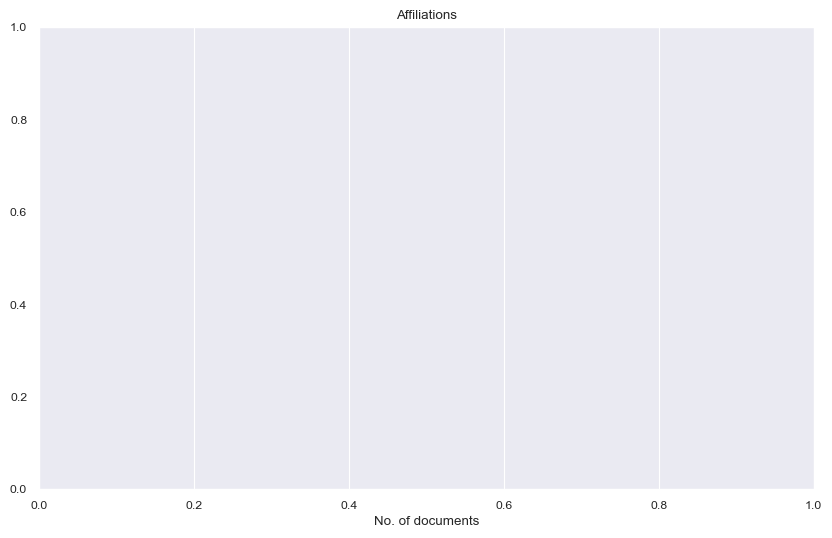

In [9]:
litstudy.plot_affiliation_histogram(docs1, limit=15);

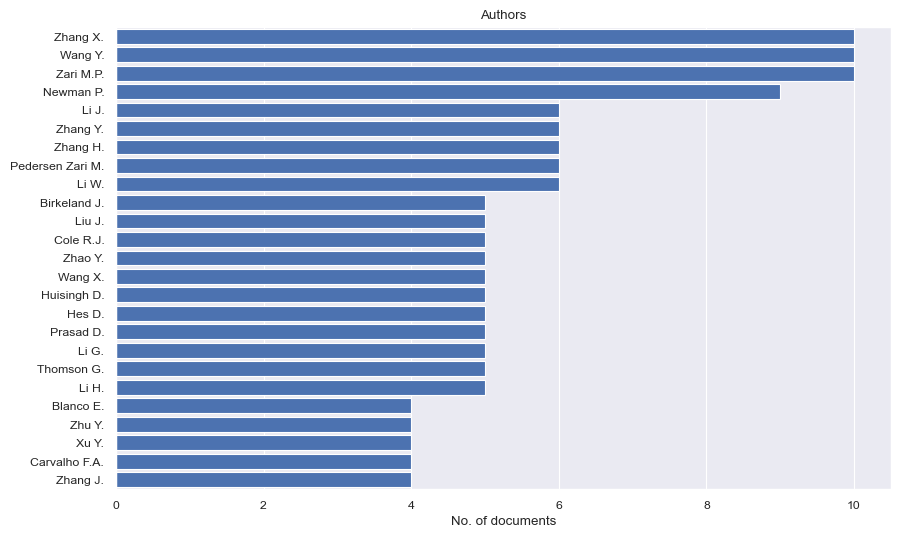

In [10]:
litstudy.plot_author_histogram(docs1);

In [7]:
litstudy.plot_language_histogram(docs);

NameError: name 'docs' is not defined

In [9]:
litstudy.plot_number_authors_histogram(docs_scopus);

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 720x432 with 1 Axes>

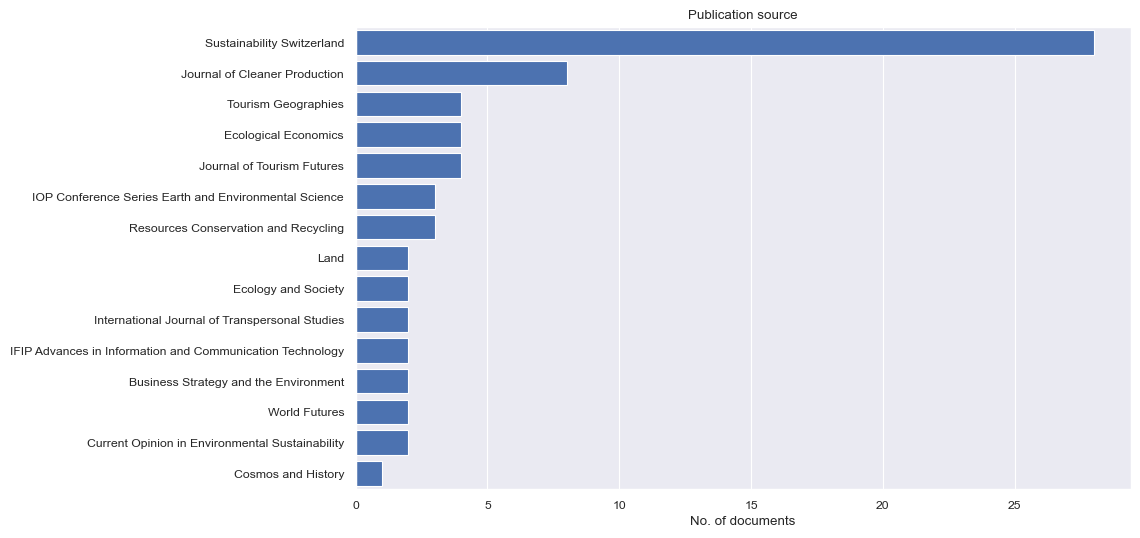

In [ ]:
# This names are long, which is why a short abbreviation is provided.
mapping = {
    "IEEE International parallel and distributed processing symposium IPDPS": "IEEE IPDPS",
    "IEEE International parallel and distributed processing symposium workshops IPDPSW": "IEEE IPDPS Workshops",
}

litstudy.plot_source_histogram(docs1, mapper=mapping, limit=15);

In [10]:
litstudy.plot_country_histogram(docs1, limit=15);

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 720x432 with 1 Axes>

In [11]:
litstudy.plot_continent_histogram(docs1);

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 720x432 with 1 Axes>

## Network analysis

The network below shows an example of a co-citation network. 
This is a type of network where nodes represent documents and edges represent pairs of documents that have been cited together simulatenously by other papers. The strength of the edges indicates how often two documents have been cited together.
Two papers with a high co-citation strength (i.e., stronger edge) are usually highly related. 

In [ ]:
litstudy.plot_cocitation_network(docs1, max_edges=100)

no edges given


## Topic modeling

litstudy supports automatic topic discovery based on the words used in documents abstracts. We show an example below. First, we need to build a corpus from the document set. Note that `build_corpus` supports many arguments to tweak the preprocessing stage of building the corpus. In this example, we pass `ngram_threshold=0.85`. This argument adds commonly used n-grams (i.e., frequent consecutive words) to the corpus. For instance, `artificial` and `intelligence` is a bigram, so a token `artificial_intelligence` is added to the corpus.

In [12]:
corpus = litstudy.build_corpus(docs1, ngram_threshold=0.8)

We can compute a word distribution using `litstudy.compute_word_distribution` which shows how often each word occurs across all documents. In this example, we focus only on n-grams by selecting tokens that contain a `_`. We see that words such as `artificial intelligence` and `trade offs` indeed have been recognized as common bigrams.

In [13]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
artificial_intelligence,19
basel_switzerland,7
business_media,26
climate_change,96
decision_making,79
distributed_ledger,5
early_warning,8
european_union,10
exclusive_license,7
forward_looking,13


Let's visualize the word distribution from this corpus.

In [14]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

<Figure size 1440x216 with 1 Axes>

This word distribution looks normal. Next, we train an NMF topic model. Topic modeling is a technique from natural language processing for discovering abstract "topics" in a set of document. We need to manually select the number of desired topics. Here we choose 15 topics. It is recommended to experiment with more or less topics to obtain topics that are more fine-grained or more coarse-grained

In [ ]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

To understand the result of NMF, we can print the top 3 words for each topic.

In [ ]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['awareness', 'systematic', 'review', 'model', 'viability']
Topic 2: ['countries', 'european', 'space', 'composite', 'achieving']
Topic 3: ['doughnut', 'needs', 'safe', 'boundaries', 'human']
Topic 4: ['supply', 'chain', 'supply_chain', 'circular', 'indicators']
Topic 5: ['production', 'manufacturing', 'design', 'circular', 'material']
Topic 6: ['tourism', 'capital', 'emerging', 'abstract', 'paradigm']
Topic 7: ['business', 'circular', 'sector', 'discourse', 'transition']
Topic 8: ['restorative', 'finance', 'circular', 'concept', 'governance']
Topic 9: ['systems', 'network', 'service', 'learning', 'law']
Topic 10: ['water', 'life', 'life_cycle', 'cycle', 'nitrogen']
Topic 11: ['urban', 'cities', 'degrowth', 'regional', 'risk']
Topic 12: ['raworth', 'university', 'kate_raworth', 'kate', 'capital']
Topic 13: ['food', 'waste', 'systems', 'plants', 'management']
Topic 14: ['vehicle', 'optimization', 'fuel', 'power', 'electric']
Topic 15: ['resilience', 'transformation', 'thinking'

An alternative way to visualize the output of NMF is to plot each discovered topic as a word cloud. The size of each word in a cloud indicate the importance of that word for that topic.

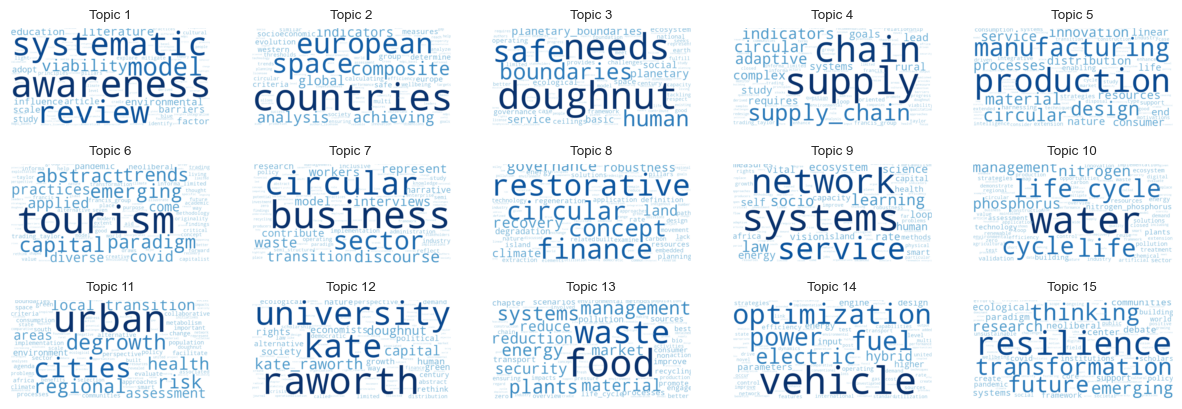

In [ ]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

These 15 topics look promising. For example, there is one topic on graphs, one on OpenACC (the open accelerators programming standard), one on OpenCL (the open compute language), one on FPGAs (field-programmable gate array), etc. 

We can visualize the results as a "landscape" plot. This is a visual appealing way to place documents on 2D plane. The documents are placed such that similar documents are located closed to each other. However, this is a non-linear embedding so the distances between the documents are not linear.

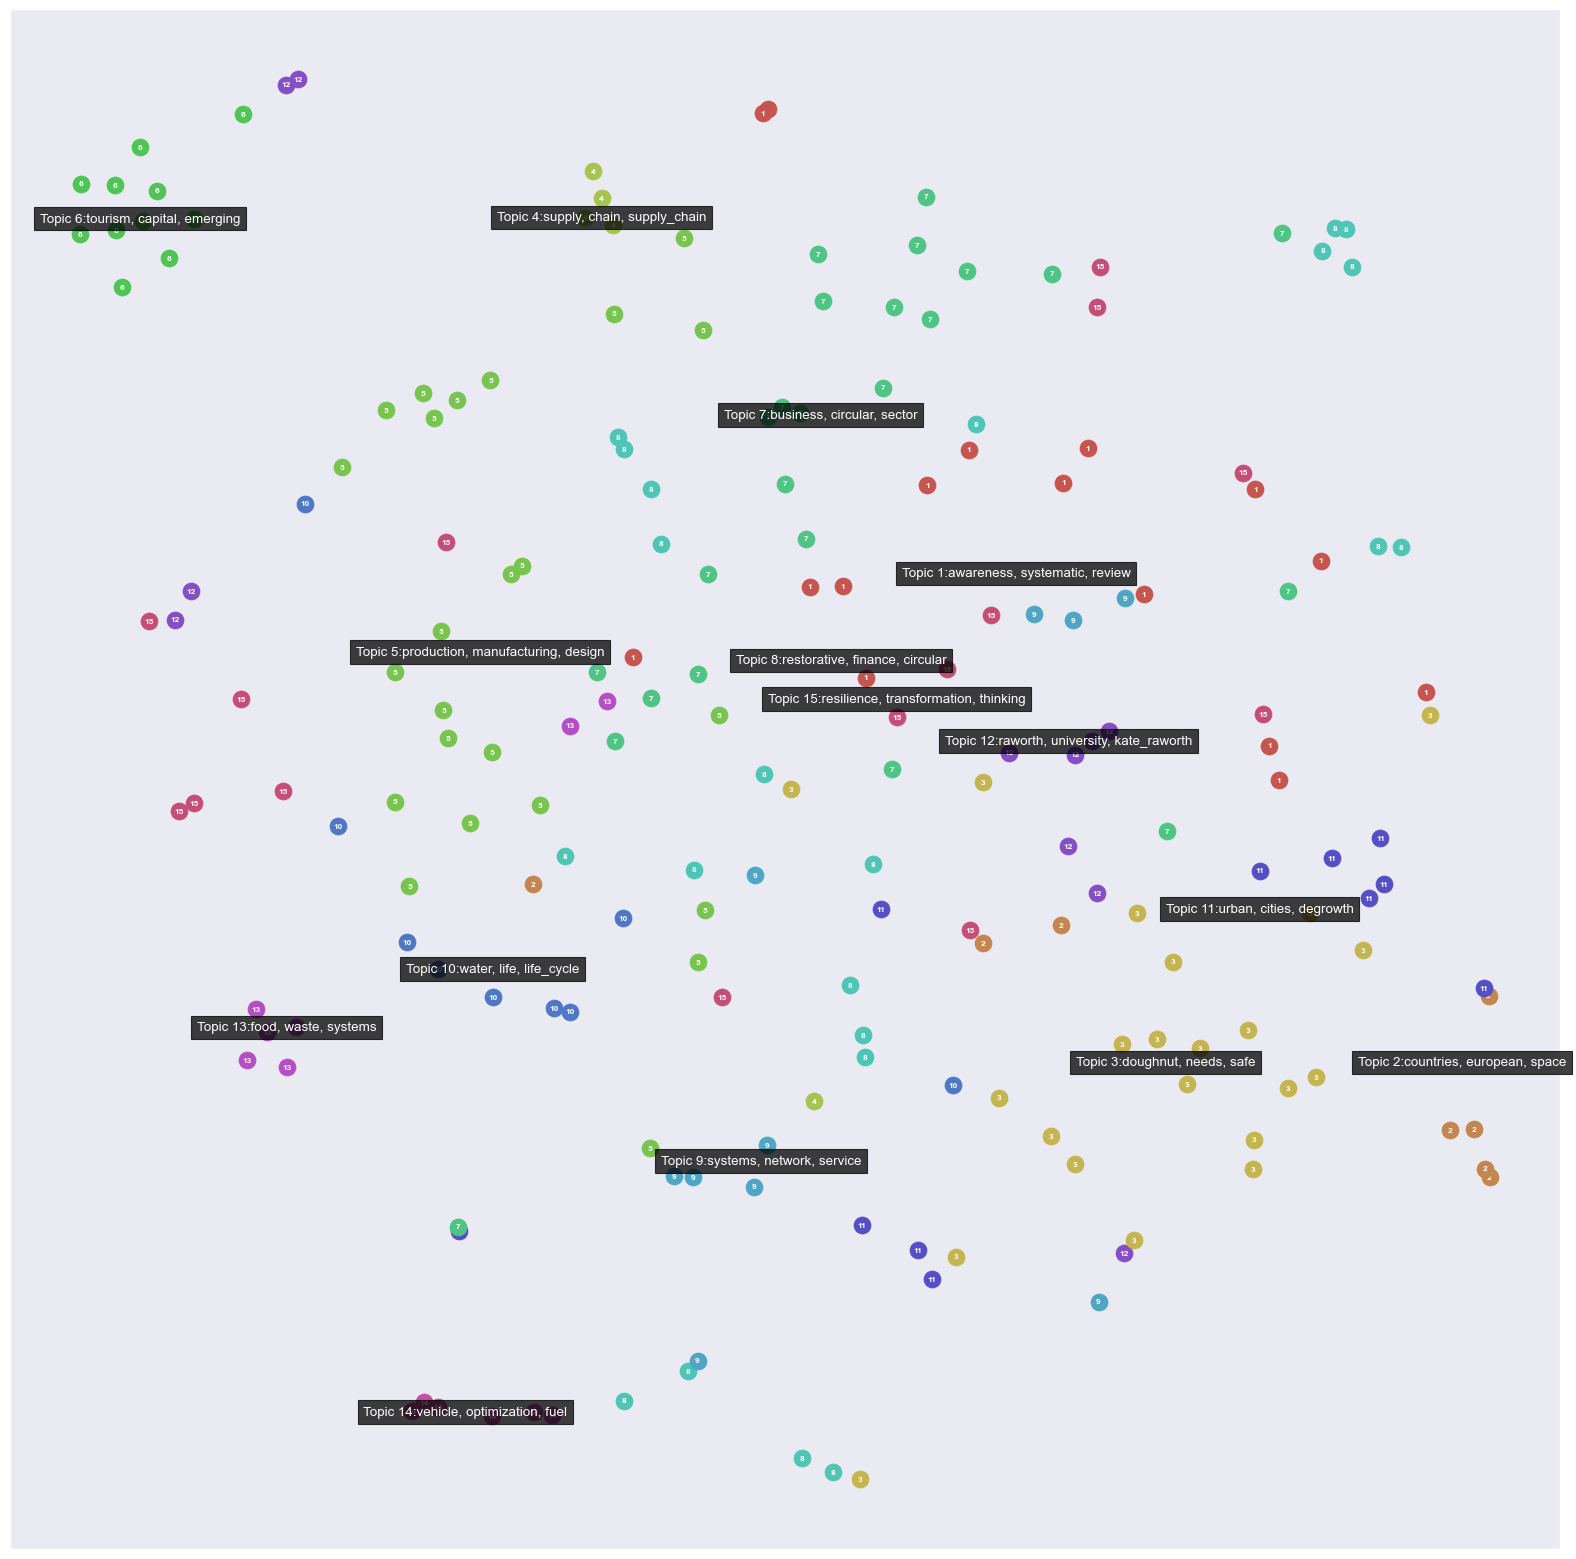

In [ ]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

## Advanced topic modeling

In [ ]:
topic_id = topic_model.best_topic_for_token('local')

Let's print the top 10 papers that most stongly belong to this topic to check the results. 

In [ ]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs1[int(doc_id)].title)

Health risks in our environment: Urban slum youthâ€™ perspectives using photovoice in Kampala, Uganda
On the road to urban degrowth economics? Learning from the experience of C40 cities, doughnut cities, Transition Towns, and shrinking cities
‘Beyond GDP’ in cities: Assessing alternative approaches to urban economic development
Examining urban metabolism: A material flow perspective on cities and their sustainability
Conundrums in implementing a green economy in the Gauteng City-Region
Humane by choice, smart by default: 39 building blocks for cities of the future
Urban river recovery inspired by nature-based solutions and biophilic design in Albufeira, Portugal
Toward just and sustainable cities: Identifying key areas for urban, peri-urban and rural sustainability collaborative initiatives
A safe and just space for urban mobility: A framework for sector-based sustainable consumption corridor development
The role of public-private partnerships in housing as a potential contributor to s

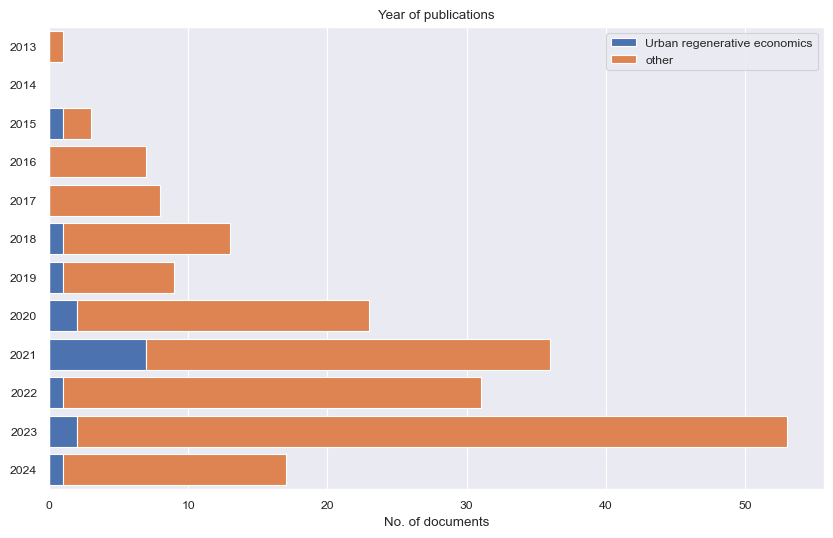

In [ ]:
threshold = 0.2
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs1 = docs1.add_property('dl_topic', dl_topic)


groups = {
    'Urban regenerative economics': 'dl_topic',
    'other': 'not dl_topic', 
}

litstudy.plot_year_histogram(docs1, groups=groups, stacked=True);

In [ ]:
table = litstudy.compute_year_histogram(docs1, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,Urban regenerative economics,other
2013,0.000000,100.000000
2014,NaN,NaN
2015,33.333333,66.666667
2016,0.000000,100.000000
2017,0.000000,100.000000
2018,7.692308,92.307692
2019,11.111111,88.888889
2020,8.695652,91.304348
2021,19.444444,80.555556
2022,3.225806,96.774194


Alternatively, we can plot the two groups for the publications source.

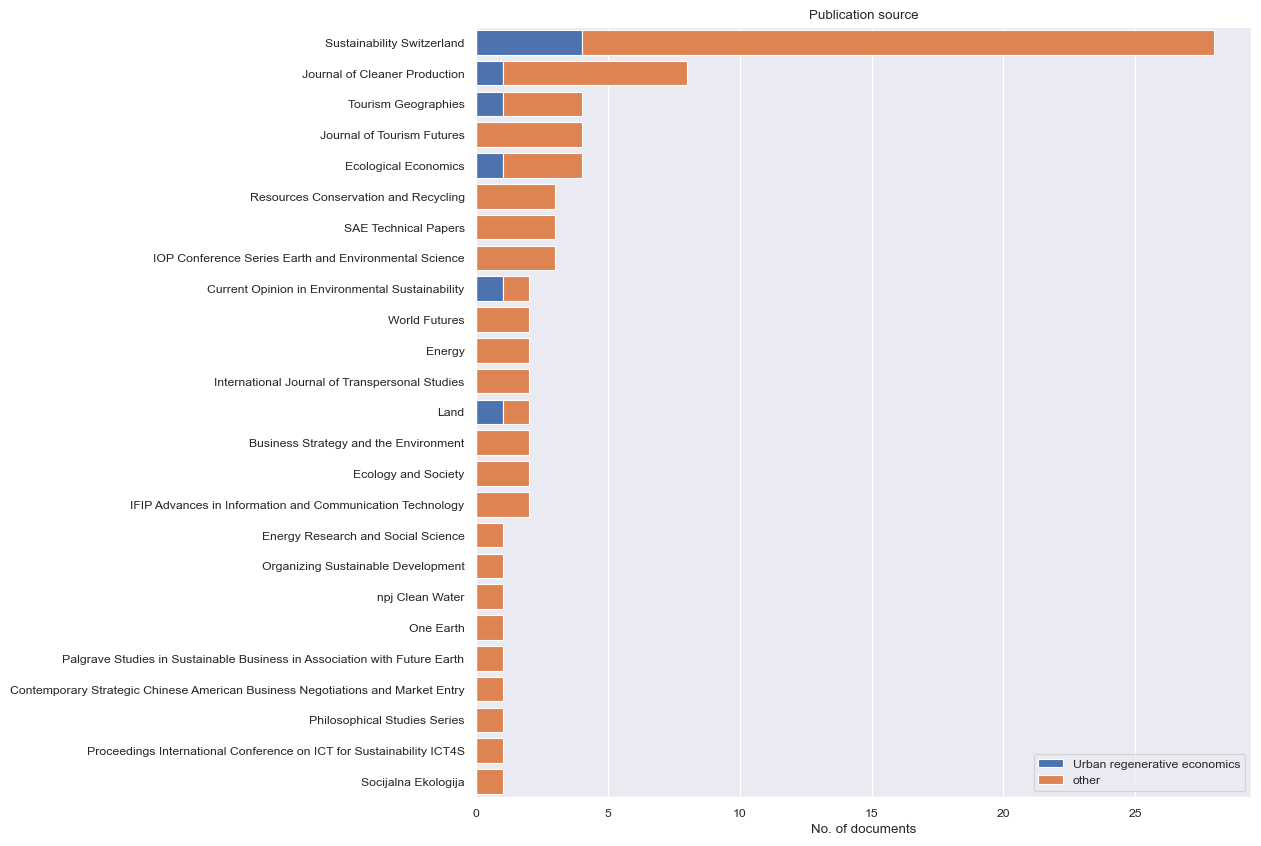

In [ ]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs1, groups=groups, limit=25, stacked=True);

In [ ]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs1, groups=groups)

# Add column 'total'
table['total'] = table['Urban regenerative economics'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['deep learning related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

KeyError: 'deep learning related'